In [59]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from skimage import io
from sklearn.utils import shuffle

In [60]:
n_colors = [64, 32, 16, 8, 4]

In [61]:
# Load the photo
image = io.imread("мавпи.jpg")

In [62]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow works well on float data (need to
# be in the range [0-1])
image = np.array(image, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(image.shape)
print(original_shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))


(2661, 3992, 3)


Fitting model on a small sub-sample of the data
done in 0.271s.
Predicting color indices on the full image (k-means)
done in 0.241s.
Fitting model on a small sub-sample of the data
done in 0.291s.
Predicting color indices on the full image (k-means)
done in 0.151s.
Fitting model on a small sub-sample of the data
done in 0.261s.
Predicting color indices on the full image (k-means)
done in 0.093s.
Fitting model on a small sub-sample of the data
done in 0.251s.
Predicting color indices on the full image (k-means)
done in 0.066s.
Fitting model on a small sub-sample of the data
done in 0.269s.
Predicting color indices on the full image (k-means)
done in 0.039s.


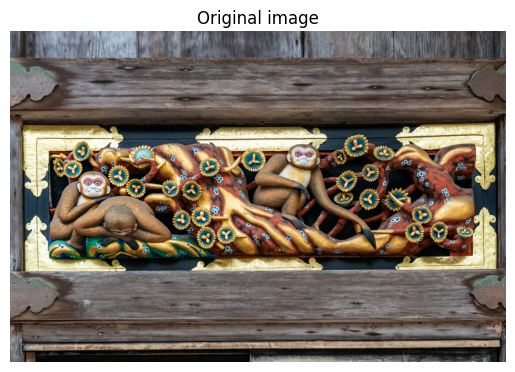

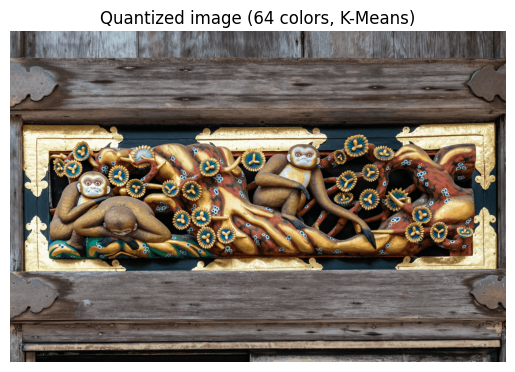

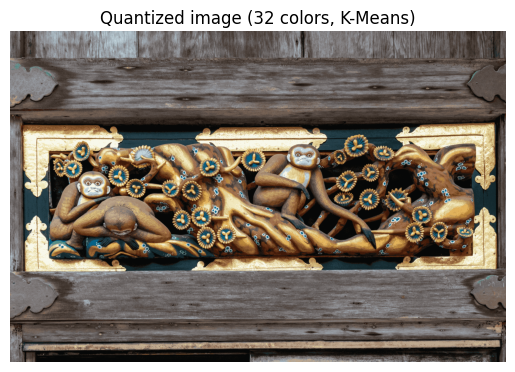

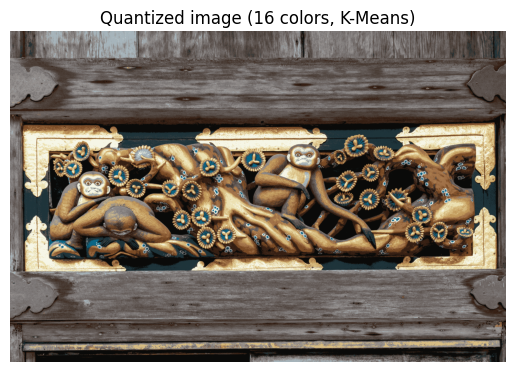

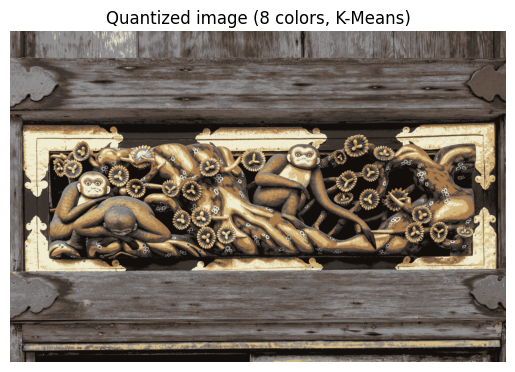

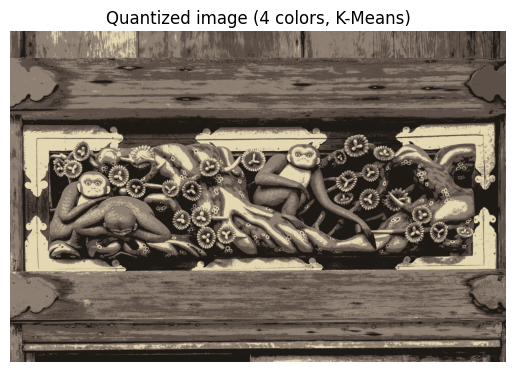

In [64]:

def compress_image(image_array, n_colors): 
    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0, n_samples=10_000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print(f"done in {time() - t0:0.3f}s.")

    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"done in {time() - t0:0.3f}s.")
    q_x = kmeans.cluster_centers_[labels]
    q_img = q_x.reshape(w, h, -1)
    return q_img

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(image)

q_images = [compress_image(image_array, x_colors) for x_colors in n_colors]
for idx, x in enumerate(n_colors):
    plt.figure(idx + 2)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({x} colors, K-Means)")
    plt.imshow(q_images[idx])   
